## Exploratory Data Analysis (EDA)
This notebook demonstrates use of various EDA techniques to summarize and explore a dataset

In [1]:
#Library imports
import numpy as np # for vector / matrix operations
import pandas as pd # for data manipulation

from matplotlib import pyplot # for basic plots
import seaborn as sns # for advanced plots

In [ ]:
# By default colab may have older version (1.5.*) of pandas
# In this notebook we will use the crosstab() function from pandas package.
# This function is not avialable in older version of pandas.

# First check the version of pandas in your colab by running the command below
# pd.__version__
# If it returns a version 2.1.* or later
#   skip next few lines and proceed to the next code block

# If your version is older than 2.1
# Upgrade the pandas package to a newer version (2.1.*) by running the command below.
# After running the above installation code, restart the runtime

#!pip install -U pandas

# From "Runtime" menu, Click on "Restart Sression". This will restart the kernel.
# After restart, check if the pandas version is upgraded
#pd.__version__

'2.2.2'

# Procure the data
We are going to use a diabetes related dataset for this exercise.
This dataset is hosted by Kaggle. The data description is located in the URL (https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

Log in to Kaggle with your personal Google account and you can download tha zip file conagining the dataset. Unzip the file and save the csv file inside it to your local directory.


# Tips to access data from your Google drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# Once successful, you will see message
# "Mounted at /content/gdrive"


Mounted at /content/gdrive


In [3]:
# Once the mounting is successful run the following commands
root_dir = "/content/gdrive/MyDrive/"
indir = '/content/gdrive/MyDrive/Colab Notebooks/MLcourse/MLdata/'
infile = indir + 'diabetes.csv'

#Load the data from csv file

In [4]:
# Import data from csv file using read_csv() function from pandas package
# The output df_diabetes is a Pandas dataframe object
df_diabetes = pd.read_csv(infile)

In [5]:
# Manually view a few records of the data
'''
Use .sample(3) to see randomly seleted 3 records
Use .head(3) to see first 3 records
Use .tail(3) to see last 3 records
'''
df_diabetes.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
110,3,171,72,33,135,33.3,0.199,24,1
116,5,124,74,0,0,34.0,0.220,38,1
645,2,157,74,35,440,39.4,0.134,30,0
453,2,119,0,0,0,19.6,0.832,72,0


# Broad goals of EDA

Following are some of the typical goals of EDA


*   For continuous variables, study measures of central tendencies (e.g. mean, median), measures of dispersions (e.g. standard deviation, inter-quartile range (IQR)), skewness, presence of outliers, proportion of missing values
*   For categorical variables, study the frequency distributions of categories, presence of categories with too few observations, proportion of missing values



# Basic data summaries

*describe()* function of Pandas package if a good starting point for looking at basic summaries of the columns of the data. The diabetes dataset has only numeric columns. We will show a separate example where we have categorical columns and how to summarize the categorical columns.

In [6]:
'''
use .describe() to see sample statistics of the numeric columns
'''
df_diabetes.describe().round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.349
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.477
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2438,24.0000,0.000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.000


# Graphical summaries of the data


## Boxplots
Basic graphical summary for continuous data is the Boxplot. The sections below show some example of creating boxplots using Seaborn package. Based the dataset and specific analysis needs one uses different variations of boxplots (e.g. side-by-side boxplots, [grouped boxplots](https://seaborn.pydata.org/examples/grouped_boxplot.html) etc.)

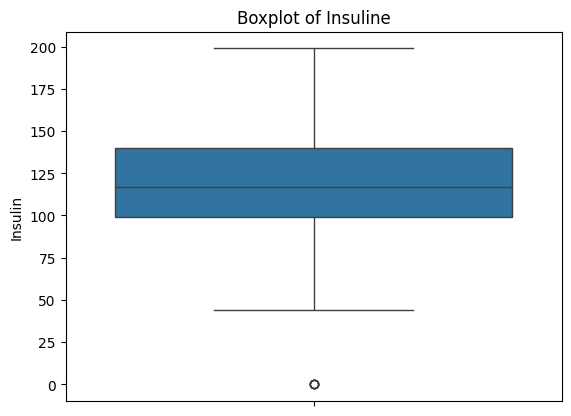

In [ ]:
# Boxplot
# Create boxplot object, add components to it\
# and finally plot it using pyplot
bxp = sns.boxplot(data = df_diabetes, y="Glucose")
bxp.set( ylabel='Insulin', xlabel='', title= 'Boxplot of Insuline')
pyplot.show()

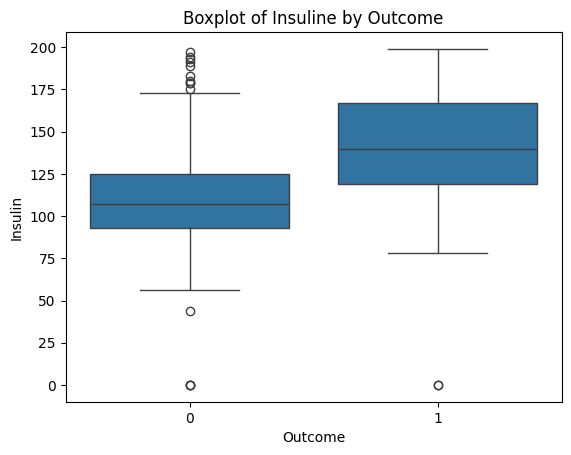

In [ ]:
# Boxplot by group
# Create boxplot object, add components to it\
# and finally plot it using pyplot
bxp = sns.boxplot(data = df_diabetes, y="Glucose", x="Outcome")
bxp.set( ylabel='Insulin', xlabel='Outcome',
        title= 'Boxplot of Insuline by Outcome')
pyplot.show()

## Univariate distributions
* Histogram
* Density plots
* These plots can be further modified to show distribution by groups. Histogram or density plots are overlaid in same graph, coded with different color. Also Density can be overlaid on histogram.

<ipython-input-14-116c52b4c7fc>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data = df_diabetes, x="Glucose", alpha=.5, palette="muted")


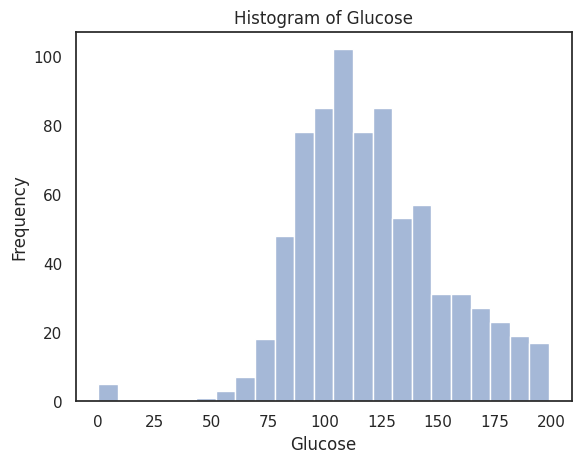

In [ ]:
sns.set_theme(style="white")
# Histogram by groups
histplot = sns.histplot(data = df_diabetes, x="Glucose", alpha=.5, palette="muted")
histplot.set( ylabel='Frequency', xlabel='Glucose',
           title= 'Histogram of Glucose')
pyplot.show()

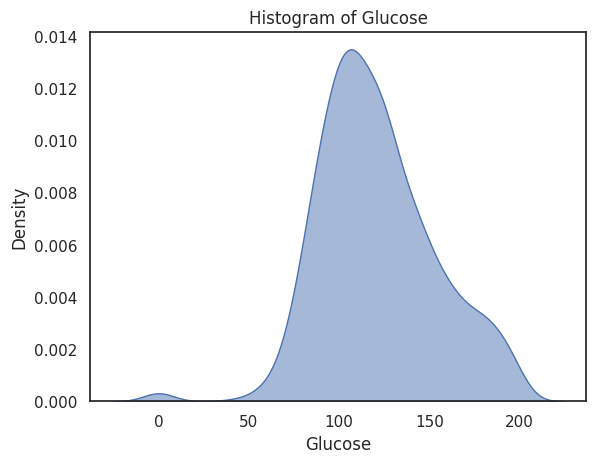

In [ ]:
sns.set_theme(style="white")
# Histogram by groups
densplot = sns.kdeplot(data = df_diabetes, x="Glucose", fill="blue", alpha=.5)
densplot.set( ylabel='Density', xlabel='Glucose', title= 'Histogram of Glucose')
pyplot.show()

In [ ]:
#age_group = ["Below 40"]*df_diabetes.shape[0]
#age_group[] = 1
df_diabetes['age_group'] = ["Age: Below 40"]*df_diabetes.shape[0]
df_diabetes.loc[(df_diabetes.Age >= 40), 'age_group'] = "Age: 40+"

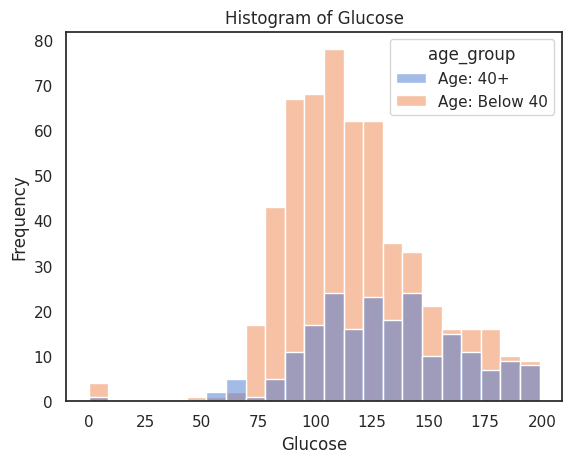

In [ ]:
#Histogram by groups
sns.set_theme(style="white")
# Histogram by groups
histplot = sns.histplot(data = df_diabetes, x="Glucose", hue = "age_group",
                        alpha=.5, palette="muted")
histplot.set( ylabel='Frequency', xlabel='Glucose',
           title= 'Histogram of Glucose')
pyplot.show()

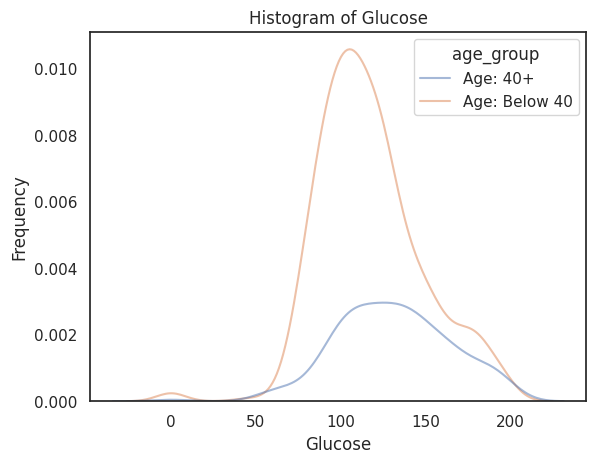

In [ ]:
# Density plot by groups
sns.set_theme(style="white")
densplot = sns.kdeplot(data = df_diabetes, x="Glucose", hue = "age_group", alpha=.5)
densplot.set( ylabel='Frequency', xlabel='Glucose', title= 'Histogram of Glucose')
pyplot.show()

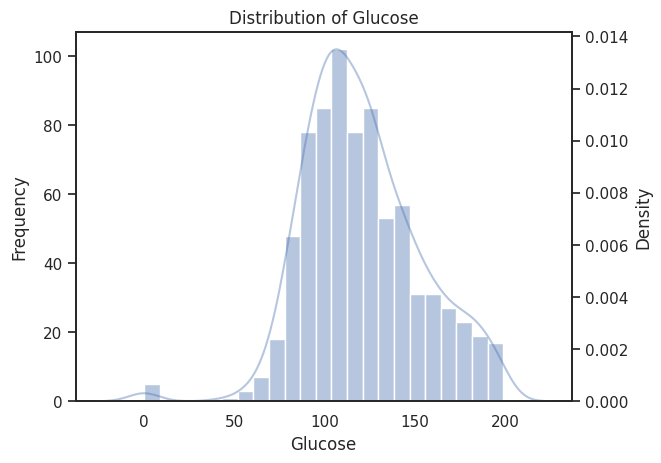

In [ ]:
#Overlay density on histogram
fig, ax1 = pyplot.subplots()
histplot = sns.histplot(data = df_diabetes, x="Glucose", alpha = 0.4, ax=ax1)
histplot.set( ylabel='Frequency', xlabel='Glucose',
             title= 'Distribution of Glucose')

# twinx() create twin axes that share the x-axis but have different y-axes.
# Allows us to overlay two plots with different y-scales
# on the same set of x-axis values.
ax2 = ax1.twinx()
densplot = sns.kdeplot(data = df_diabetes, x="Glucose", alpha=0.4, ax=ax2)
pyplot.show()

## Bivariate plots
* Scatter plot: Plot two continuous variables one aginst other. It can be further modified to show multiple groups (by color coding the points, using different marker shapes etc.). A third continuous variable can be shown using smoothly varying hue of the color of the points.


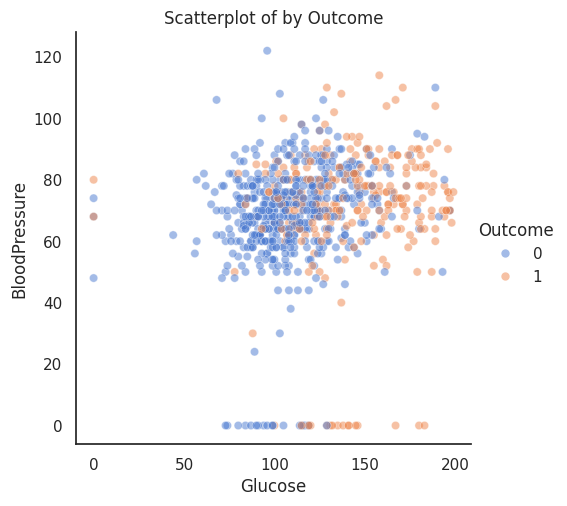

In [ ]:
# Scatterplot
scplot = sns.relplot(data = df_diabetes, x="Glucose", y="BloodPressure",
                     hue="Outcome",  alpha=.5, palette="muted")
scplot.set( ylabel='BloodPressure', xlabel='Glucose',
           title= 'Scatterplot of by Outcome')
pyplot.show()

## Scatterplot matrix
[Scatter plot matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html) is an information dense graphical display that lets you explore multiple continuous variables in your dataset in a single plot.

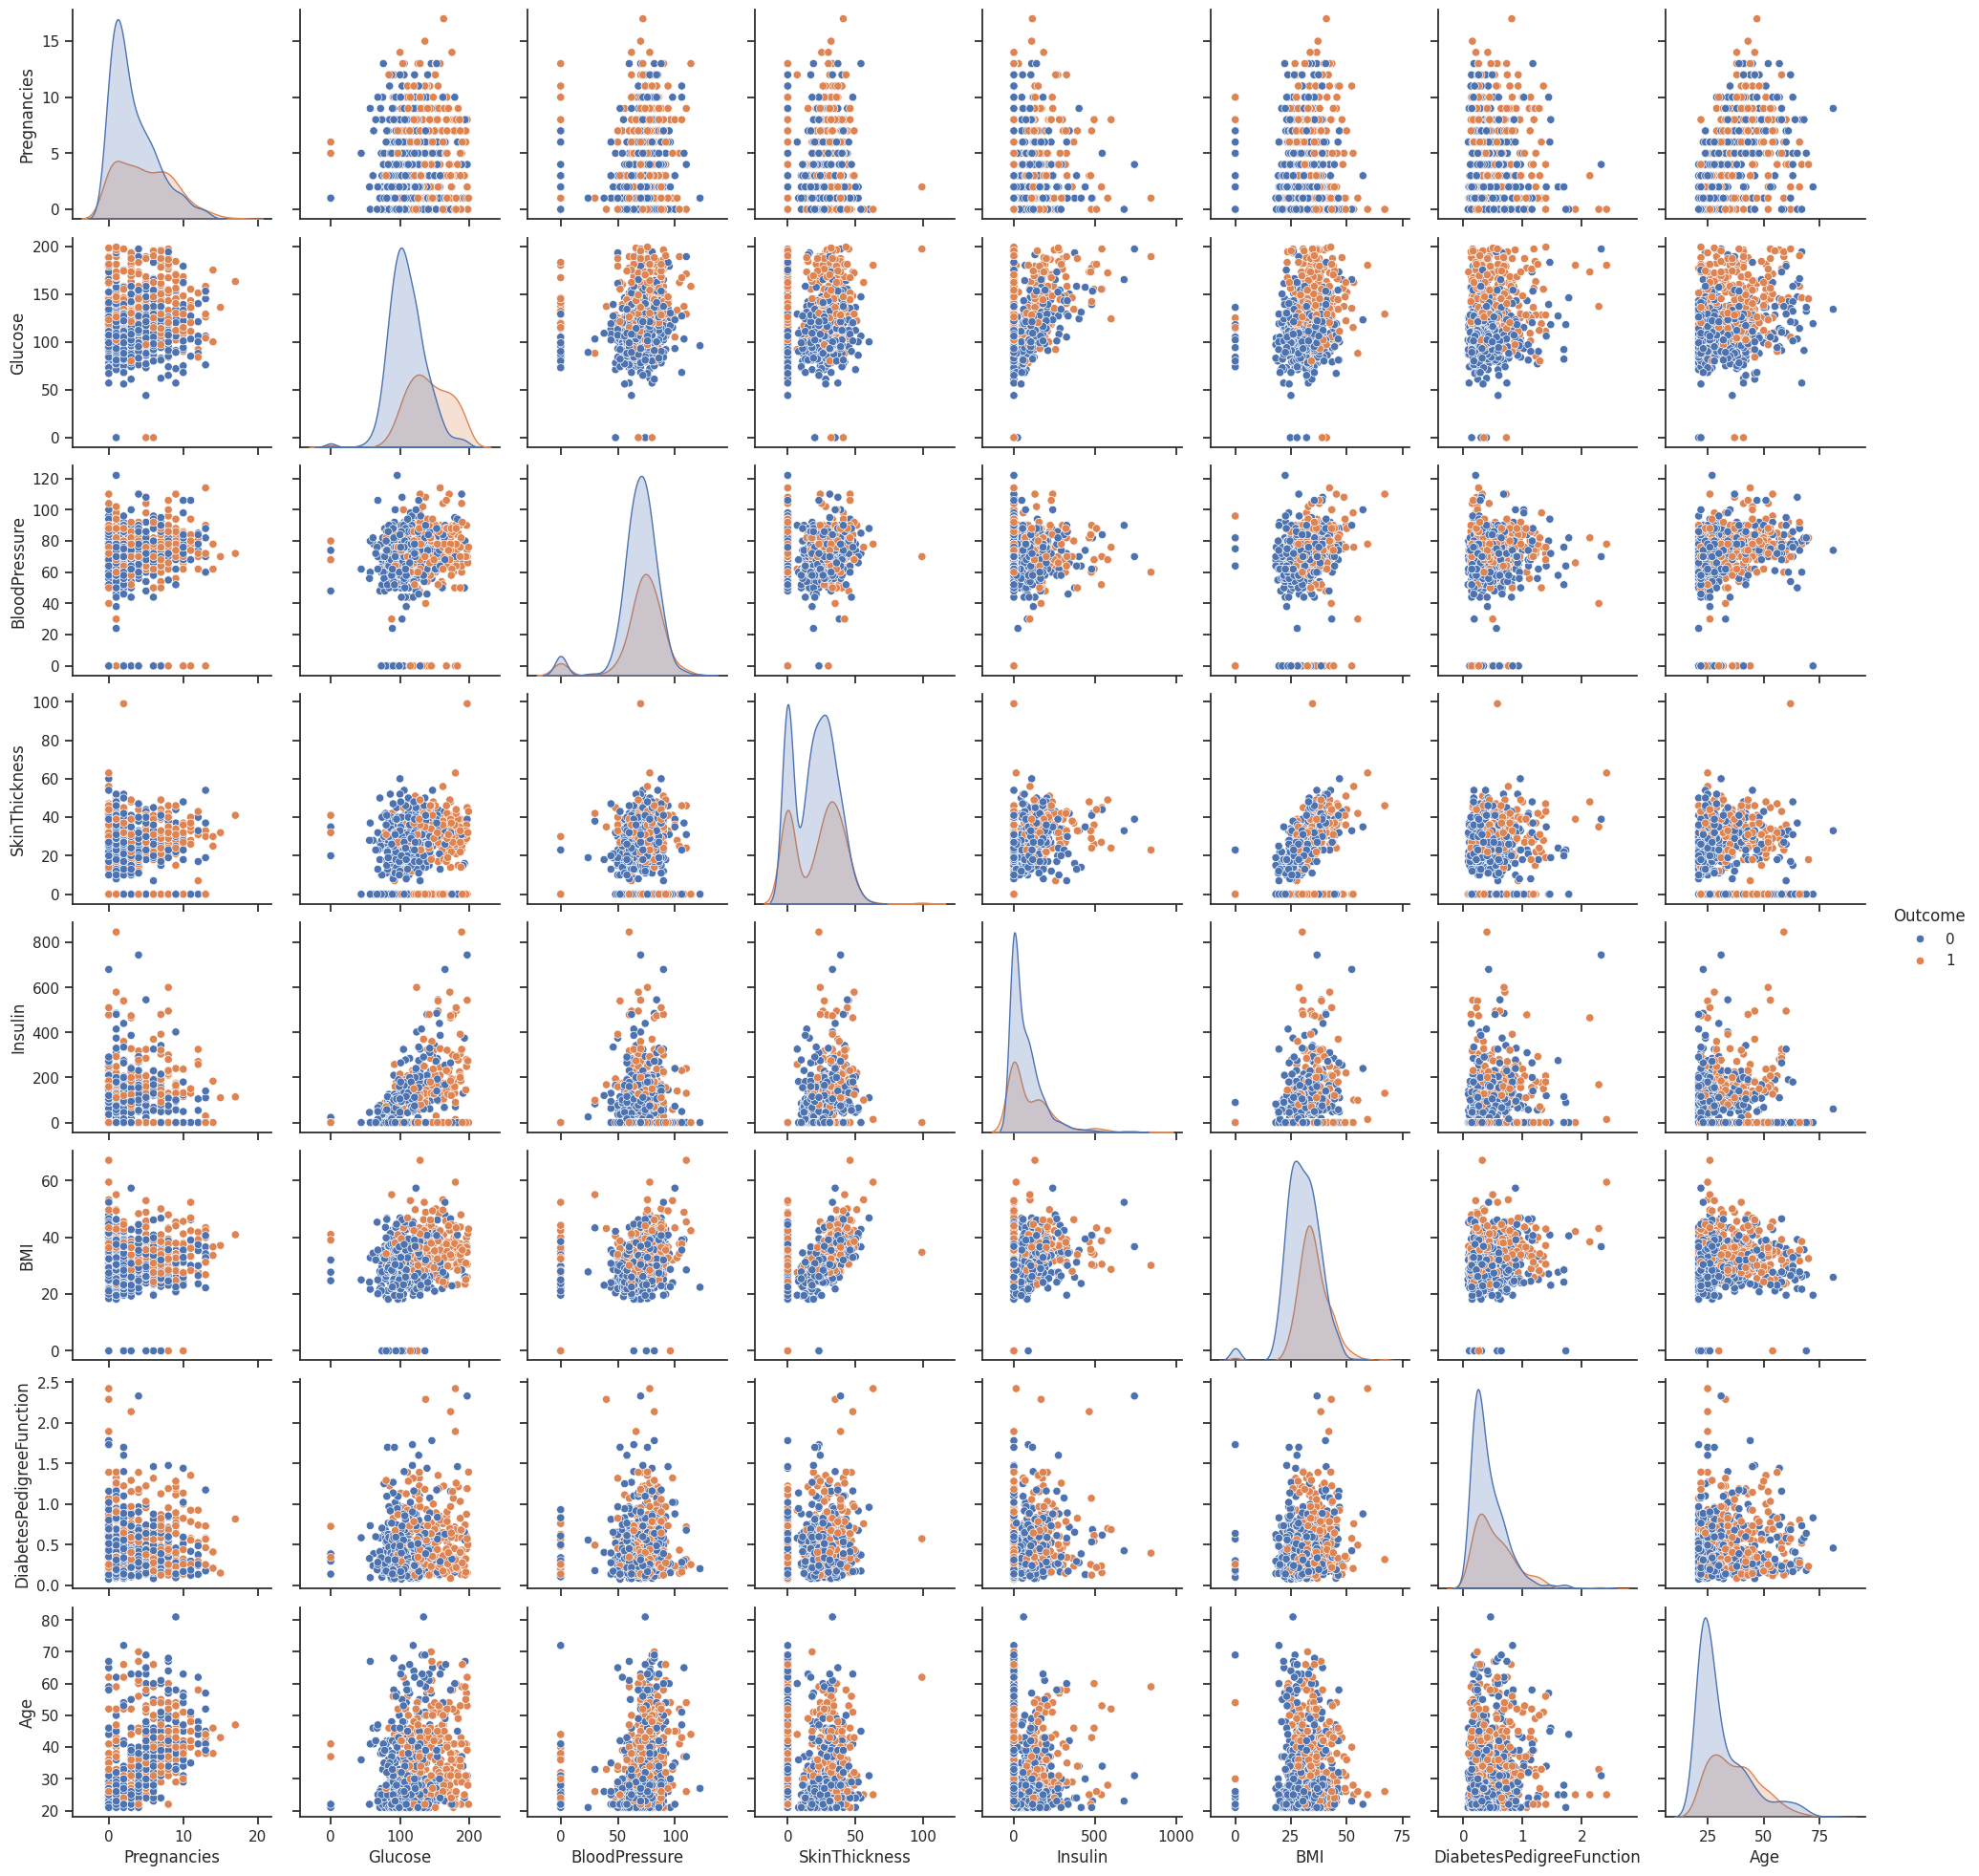

In [ ]:
# Scatterplot matrix, by group
sns.set_theme(style="ticks")
spmat = sns.pairplot(df_diabetes, hue="Outcome")
pyplot.show()

Here are a few observations we may make from the plots
* None of the variables provide very clear separation between no-diabetes *(Outcome=0)* and diabetes *(Outcome=1)* cases.
* Glucose variable perhaps provide the best separation (density plot in row 2, column 2) between the two groups.
* For many variables, there are zero values, which are likely to be missing vlaues or outliers. They typically show up as a stack of zero values (e.g. see plots in last row, columns 3-5). These may need to be transformed in some way for downstream analysis.
* Skinthickness variables show bimodal distribution (density plot in row 4, column 4). That maybe a proxy for some other varaible (but not Outcome).
* The distribution of the Insulin variable is skewed with a long right tail.


# EDA on datasets with categorical variables


Some of the basic summaries for categorical variables.
* Frequency distribution (one-dimensional contigency tables)
* Bar graphs
* Bivariate analysis : corsstabs (two-dimensional contigency tables)

In [ ]:
# Read breast cancer data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#root_dir = "/content/gdrive/MyDrive/"
indir = '/content/gdrive/MyDrive/Colab Notebooks/MLcourse/MLdata/breast_cancer/'
infile_data = indir + 'breast-cancer.data'
infile_colnames = indir + 'breast_cancer_column_names_only.txt'


Mounted at /content/gdrive


In [ ]:
# data file is a csv file
df_bcancer = pd.read_csv(infile_data, header=None)
# Column names file has only 1 row, comma separated
df_colnames = pd.read_csv(infile_colnames)
colnames = list(df_colnames[0:])
# Set the column names of the data frame
df_bcancer.columns = colnames

In [ ]:
#Manually check sample records
df_bcancer.sample(3)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
84,no-recurrence-events,40-49,premeno,20-24,0-2,no,1,left,right_low,no
49,no-recurrence-events,40-49,premeno,20-24,0-2,no,1,right,left_low,no
235,recurrence-events,50-59,premeno,25-29,3-5,yes,3,left,left_low,yes


## One dimensional analysis
Use *value_counts()* function from Pandas package to generate frequency distribution of individual columns. Use function *crosstab()* from pandas packages to generate a bivariate frequency table

In [ ]:
# Univariate frequency distribution
print(df_bcancer['age'].value_counts())

age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64


## Two-dimensional (Bivariate) analysis
Use **crosstab()** function from Pandas package to generate bivariate frequency distribution based on two categorical columns.


Use **heatmap()** function from Seaborn package to generate view thw bivariate frequency distribution as a heatmap. Heatmap visualization is helpful if you have fairly large number of cells in the bivariate distribution table.



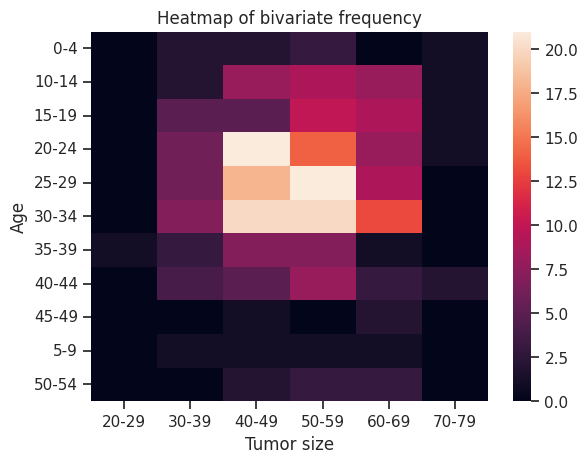

In [ ]:
import seaborn as sns
xtab = pd.crosstab(df_bcancer['tumor-size'], df_bcancer['age'])

#print(xtab)
hmap = sns.heatmap(xtab)
hmap.set( ylabel='Age', xlabel='Tumor size', title= 'Heatmap of bivariate frequency')
pyplot.show()

Cross tabulation

In [ ]:
age_group = list(xtab.columns)
age_groups_ordered = np.sort(age_group)
t_sizes = np.sort(list(xtab.index))
t_sizes_ordered = ['0-4', '5-9']+ [x for x in t_sizes if x not in ['0-4', '5-9'] ]
print(age_groups_ordered)
print(t_sizes_ordered)

['20-29' '30-39' '40-49' '50-59' '60-69' '70-79']
['0-4', '5-9', np.str_('10-14'), np.str_('15-19'), np.str_('20-24'), np.str_('25-29'), np.str_('30-34'), np.str_('35-39'), np.str_('40-44'), np.str_('45-49'), np.str_('50-54')]


In [ ]:
from seaborn._core.data import DataFrame
foo = pd.DataFrame(xtab)
foo.index

Index(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '5-9', '50-54'],
      dtype='object', name='tumor-size')

In [ ]:
'''
age_group = list(xtab.columns)
age_groups_ordered = np.sort(age_group)
t_sizes = np.sort(list(xtab.index))
t_sizes_ordered = ['0-4', '5-9']+ [x for x in t_sizes if x not in ['0-4', '5-9'] ]
print(age_groups_ordered)
print(t_sizes_ordered)
'''
xtab['50-59'][['0-4','5-9','20-24','25-29']]

,50-59
tumor-size,
0-4,3
5-9,1
20-24,14
25-29,21


In [ ]:
age_groups_ordered

array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype='<U5')

# Other comments
* TBD

# Additional Resources

* About the dataset used in this tutorial
  *  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
  * Free public [datasets](https://archive.ics.uci.edu/datasets) in the UCI dataset repository

* About EDA
  * [Wikipedia page of John W. Tukey](https://en.wikipedia.org/wiki/John_Tukey), considered "father of EDA", "father of Data Science" by some
  * Amazon page of Tukey's classical book [EDA](https://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160/ref=sr_1_2?crid=3KUH02SARZILO&keywords=EDA+john+Tukey&qid=1698770397&s=books&sprefix=eda+john+tukey%2Cstripbooks%2C169&sr=1-2)

* About Python data visualization resources
  * [Gallery](https://seaborn.pydata.org/examples/index.html) of plots supported by the Seaborn package
  * [A Complete Guide to Data Visualization in Python With Libraries & More](https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python#:~:text=Matplotlib%20and%20Seaborn%20are%20python,primarily%20used%20for%20statistical%20graphs.)


